# DOMAIN:

Automobile

# DATA DESCRIPTION:

Column Name	Description
name	The name/model of the car (e.g., Honda City 2015)
year	The manufacturing year of the car
selling_price	The price at which the car is sold (target variable for regression, but can be used for clustering if transformed)
km_driven	Total kilometers the car has been driven
fuel	Type of fuel (Petrol, Diesel, CNG, Electric, LPG)
seller_type	Type of seller (Dealer, Individual, Trustmark Dealer)
transmission	Transmission type (Manual or Automatic)
owner	Ownership history (First owner, Second owner, etc.)

# Project Goal:
    
The goal of this project is to cluster similar cars based on their features using unsupervised learning (Clustering algorithms like K-Means, DBSCAN, Hierarchical Clustering, etc.).

Some possible objectives include:

Grouping cars with similar characteristics (e.g., luxury cars, budget cars, high-mileage cars, fuel-efficient cars, etc.).
Identifying price segments based on model, mileage, and condition.
Predicting market value for used cars based on clusters.
Understanding customer preferences based on different clusters.

# Business Impact in the Car Industry:

Dynamic Pricing: 
Helps car dealerships determine optimal pricing for used cars.

Personalized Recommendations: 
Used car platforms (like OLX, PAKWheels) can suggest cars based on customer preferences.

Inventory Management: 
Dealerships can identify which type of cars are in demand and stock accordingly.

Fraud Detection: 
Identifying unusually cheap or expensive cars based on mileage and age.

Market Trends Analysis: 
Helps car manufacturers understand demand for different types of vehicles.

# GOALS:

Develop a Car Recommendation System: 
Suggest the best used cars based on budget, mileage, and condition.

Build a Price Prediction Model: 
Use supervised learning after clustering to predict car prices.

Create a Market Dashboard: 
A web-based dashboard showing real-time trends in the used car market.

Startup Idea: 
A machine-learning-powered used car valuation system that helps buyers and sellers make informed decisions.

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
data = pd.read_csv('C:/Users/siyal/Downloads/Car details v3.csv') #Load

In [34]:
print(data.head()) # Show data

                           name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   Third Owner   17.7 kmpl  1497 CC      78 bhp   
3  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
4  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250N

In [35]:
print(data.info()) # Data Summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB
None


This DataFrame has 8128 rows (entries), and There are 13 different attributes (features) describing each car.

In [36]:
print(data.describe().T) # key characteristics of data #5-point summary

                count           mean            std      min       25%  \
year           8128.0    2013.804011       4.044249   1983.0    2011.0   
selling_price  8128.0  638271.807702  806253.403508  29999.0  254999.0   
km_driven      8128.0   69819.510827   56550.554958      1.0   35000.0   
seats          7907.0       5.416719       0.959588      2.0       5.0   

                    50%       75%         max  
year             2015.0    2017.0      2020.0  
selling_price  450000.0  675000.0  10000000.0  
km_driven       60000.0   98000.0   2360457.0  
seats               5.0       5.0        14.0  


The data shows a wide variety in car ages, prices, and usage. The seats variable suggests that most cars in the dataset are likely passenger vehicles.

In [37]:
duplicate_count = data.duplicated().sum()
print("Number of duplicate rows:", duplicate_count) # Duplicate count

Number of duplicate rows: 1202


In [38]:
data_clean = data.drop_duplicates()  # remove duplicates and assign the result
print(data_clean.head())

                           name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   Third Owner   17.7 kmpl  1497 CC      78 bhp   
3  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
4  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250N

In [39]:
duplicate_count = data_clean.duplicated().sum()
print("Number of duplicate rows:", duplicate_count) # after duplication results

Number of duplicate rows: 0


In [40]:
print(data.isnull().sum()) # Looking for NaN Values

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64


In [41]:
data = data.dropna(subset=['mileage', 'engine', 'max_power', 'torque', 'seats'])

In [42]:
data['mileage'] = pd.to_numeric(data['mileage'].str.replace(' kmpl', ''), errors='coerce')

In [43]:
data['engine'] = pd.to_numeric(data['engine'].str.replace(' CC', ''), errors='coerce')

In [44]:
data['max_power'] = pd.to_numeric(data['max_power'].str.replace(' bhp', ''), errors='coerce')

In [45]:
# Extract numeric part from torque using a regex
data['torque_numeric'] = data['torque'].str.extract(r'(\d+\.?\d*)')[0]

# Convert the extracted values to numeric
data['torque_numeric'] = pd.to_numeric(data['torque_numeric'], errors='coerce')

# Now fill NaN values with the median of the numeric torque
data['torque_numeric'] = data['torque_numeric'].fillna(data['torque_numeric'].median())

In [46]:
data['mileage'] = data['mileage'].fillna(data['mileage'].median())
data['engine'] = data['engine'].fillna(data['engine'].median())
data['max_power'] = data['max_power'].fillna(data['max_power'].median())
data['seats'] = data['seats'].fillna(data['seats'].median())

In [47]:
print(data.isnull().sum()) # Remaining Null

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage           0
engine            0
max_power         0
torque            0
seats             0
torque_numeric    0
dtype: int64


In [48]:
#checking for the dimension of the data
rows, column = data.shape
print('The dataset contains', rows, 'rows and', column, 'columns.')

The dataset contains 7906 rows and 14 columns.


In [49]:
print(data.dtypes)

name               object
year                int64
selling_price       int64
km_driven           int64
fuel               object
seller_type        object
transmission       object
owner              object
mileage           float64
engine              int64
max_power         float64
torque             object
seats             float64
torque_numeric    float64
dtype: object


Let's Explore Data with Visualization:

Text(0.5, 1.0, 'Selling Price Distribution')

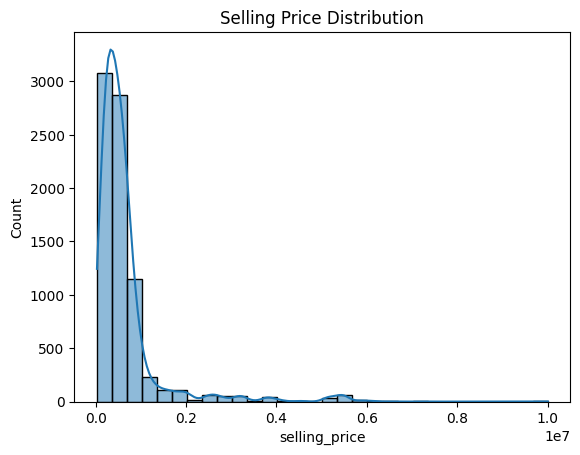

In [50]:
sns.histplot(data['selling_price'], bins=30, kde=True)
plt.title("Selling Price Distribution")

Skewness: 
The distribution is positively skewed, meaning the tail extends towards higher values.

Mode: 
The most frequent selling price appears to be around 0.2 million (200,000).

Range: 
The selling prices span a wide range, from around 0 to 10 million.

Distribution of the Numerical Variables:

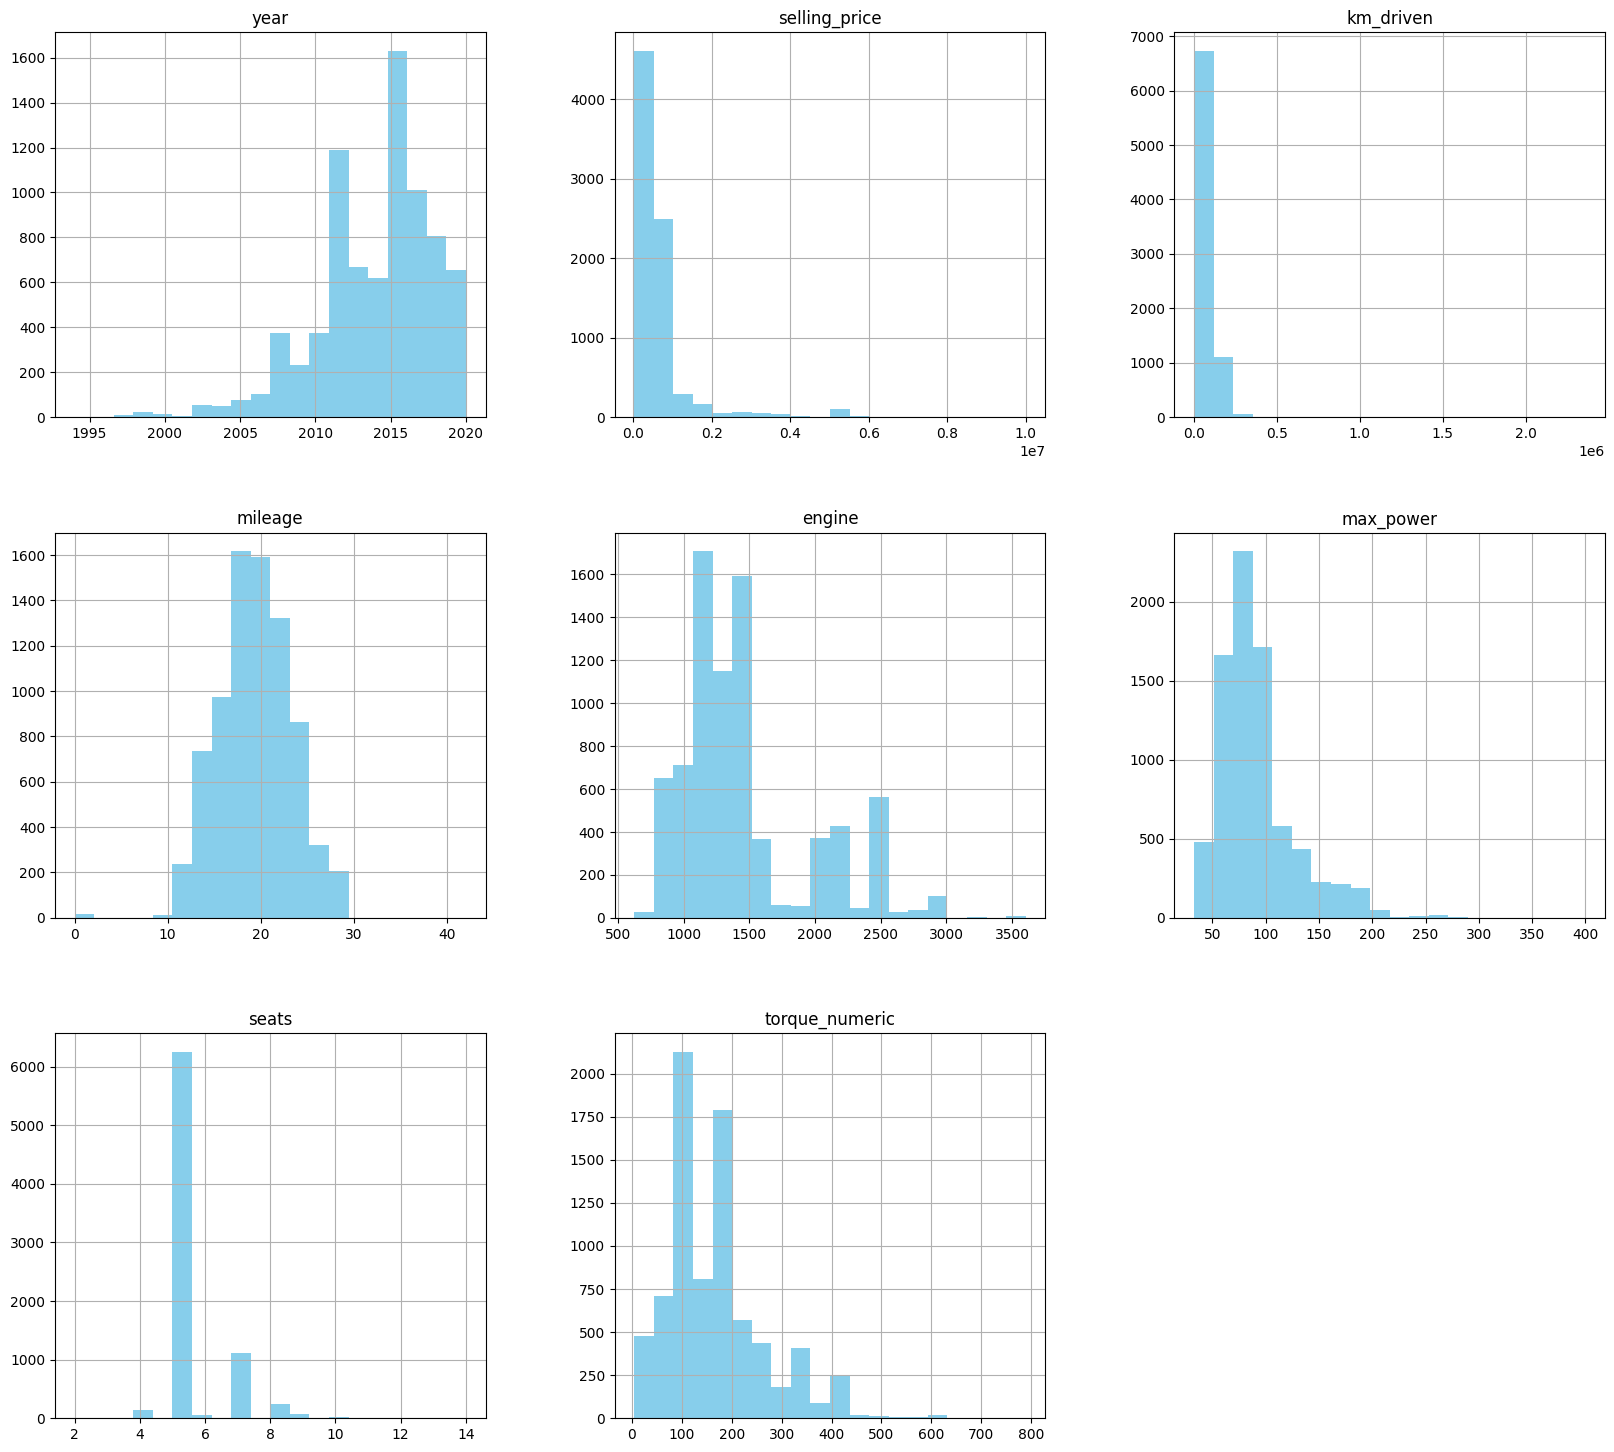

In [51]:
#plotting the distribution of the numerical variables
data.hist(bins = 20, figsize = (20, 18), color = 'skyblue')
plt.show()

These histograms give us a visual snapshot of the different characteristics of the cars in the dataset. We can see that there's a mix of newer and older cars, a wide range of prices, varying mileage, different engine sizes and power levels, and the most common number of seats is 5.

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

def plot_distributions(data, exclude_columns=None):
    if exclude_columns is None:
        exclude_columns = []
    
    # Identify numeric columns
    numeric_columns = data.select_dtypes(include=[np.number]).columns
    numeric_columns = [col for col in numeric_columns if col not in exclude_columns]
    
    # Calculate number of rows and columns needed for subplots
    n_plots = len(numeric_columns)
    n_cols = 5
    n_rows = int(np.ceil(n_plots / n_cols))
    
    # Create figure
    plt.figure(figsize=(20, 4*n_rows))
    
    # Create distribution plots
    for idx, column in enumerate(numeric_columns, 1):
        plt.subplot(n_rows, n_cols, idx)
        sns.histplot(data=data, x=column, kde=True, color='b')
        plt.title(f'Distribution of {column}')
        plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # Print summary of non-numeric columns
    non_numeric = data.select_dtypes(exclude=[np.number]).columns
    if len(non_numeric) > 0:
        print("\nNon-numeric columns that were excluded from plotting:")
        for col in non_numeric:
            print(f"- {col}")

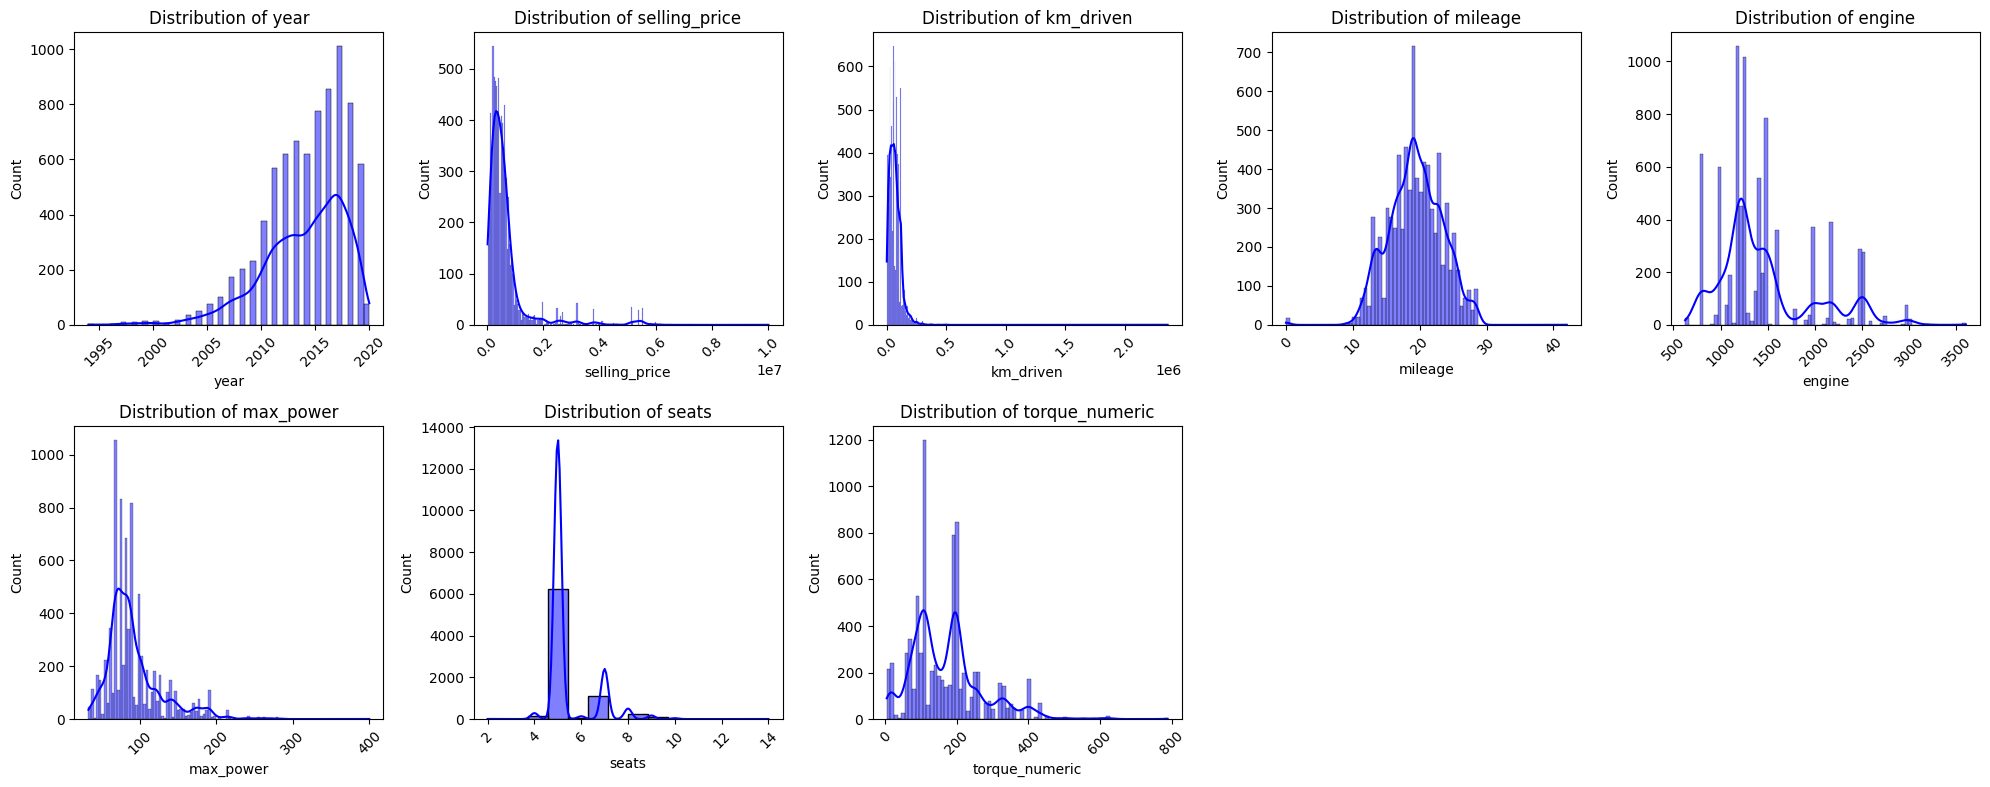


Non-numeric columns that were excluded from plotting:
- name
- fuel
- seller_type
- transmission
- owner
- torque


In [53]:
plot_distributions(data)

These histograms give us a visual snapshot of the different characteristics of the cars in the dataset. We can see that there's a mix of newer and older cars, a wide range of prices, varying mileage, different engine sizes and power levels, and the most common number of seats is 5.

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_top_vehicles(data, top_n=20, figsize=(12, 6)):
    # Get top N vehicles
    top_vehicles = data['name'].value_counts().head(top_n)
    
    # Create the plot
    plt.figure(figsize=figsize)
    
    # Create bar plot
    sns.barplot(x=top_vehicles.values, 
                y=top_vehicles.index, 
                palette='Blues_r',
                orient='h')
    
    # Customize the plot
    plt.title(f'Top {top_n} Most Common Vehicles in Dataset')
    plt.xlabel('Count')
    plt.ylabel('Vehicle Name')
    
    # Add count labels on the bars
    for i, v in enumerate(top_vehicles.values):
        plt.text(v + 1, i, str(v), va='center')
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    total_vehicles = len(data)
    unique_vehicles = len(data['name'].unique())
    top_n_percentage = (top_vehicles.sum() / total_vehicles) * 100
    
    print(f"\nSummary Statistics:")
    print(f"Total number of vehicles: {total_vehicles}")
    print(f"Number of unique vehicle models: {unique_vehicles}")
    print(f"Top {top_n} models represent {top_n_percentage:.1f}% of the dataset")

C:\Users\siyal\AppData\Local\Temp\ipykernel_11100\3755164826.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_vehicles.values,


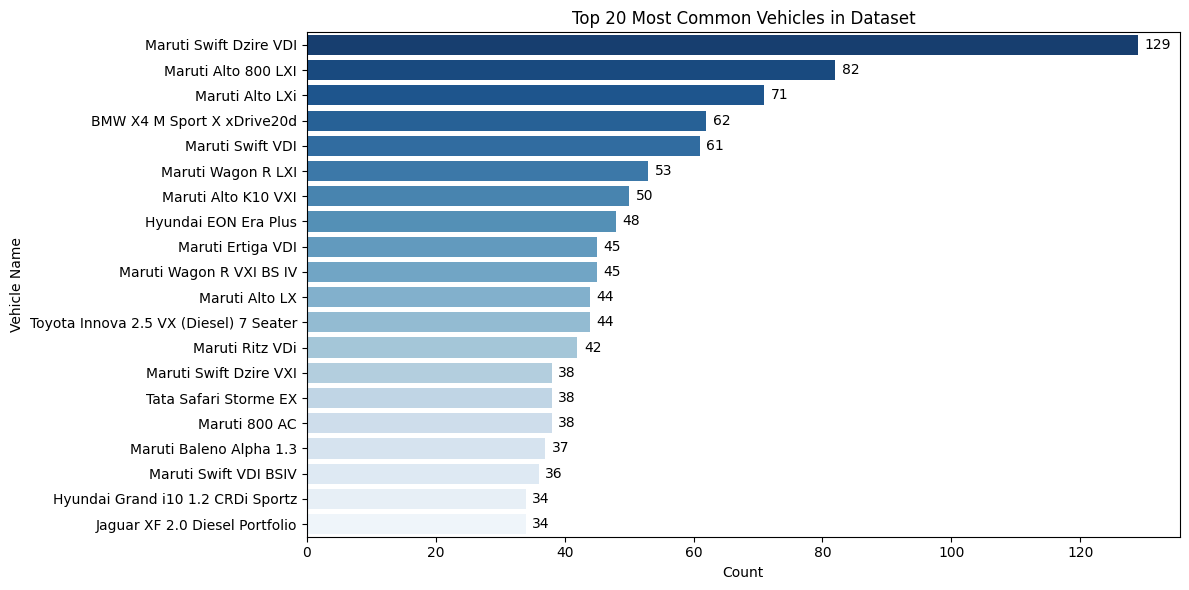


Summary Statistics:
Total number of vehicles: 7906
Number of unique vehicle models: 1982
Top 20 models represent 13.0% of the dataset


In [55]:
# Create plot with top 20 vehicles
plot_top_vehicles(data, top_n=20)

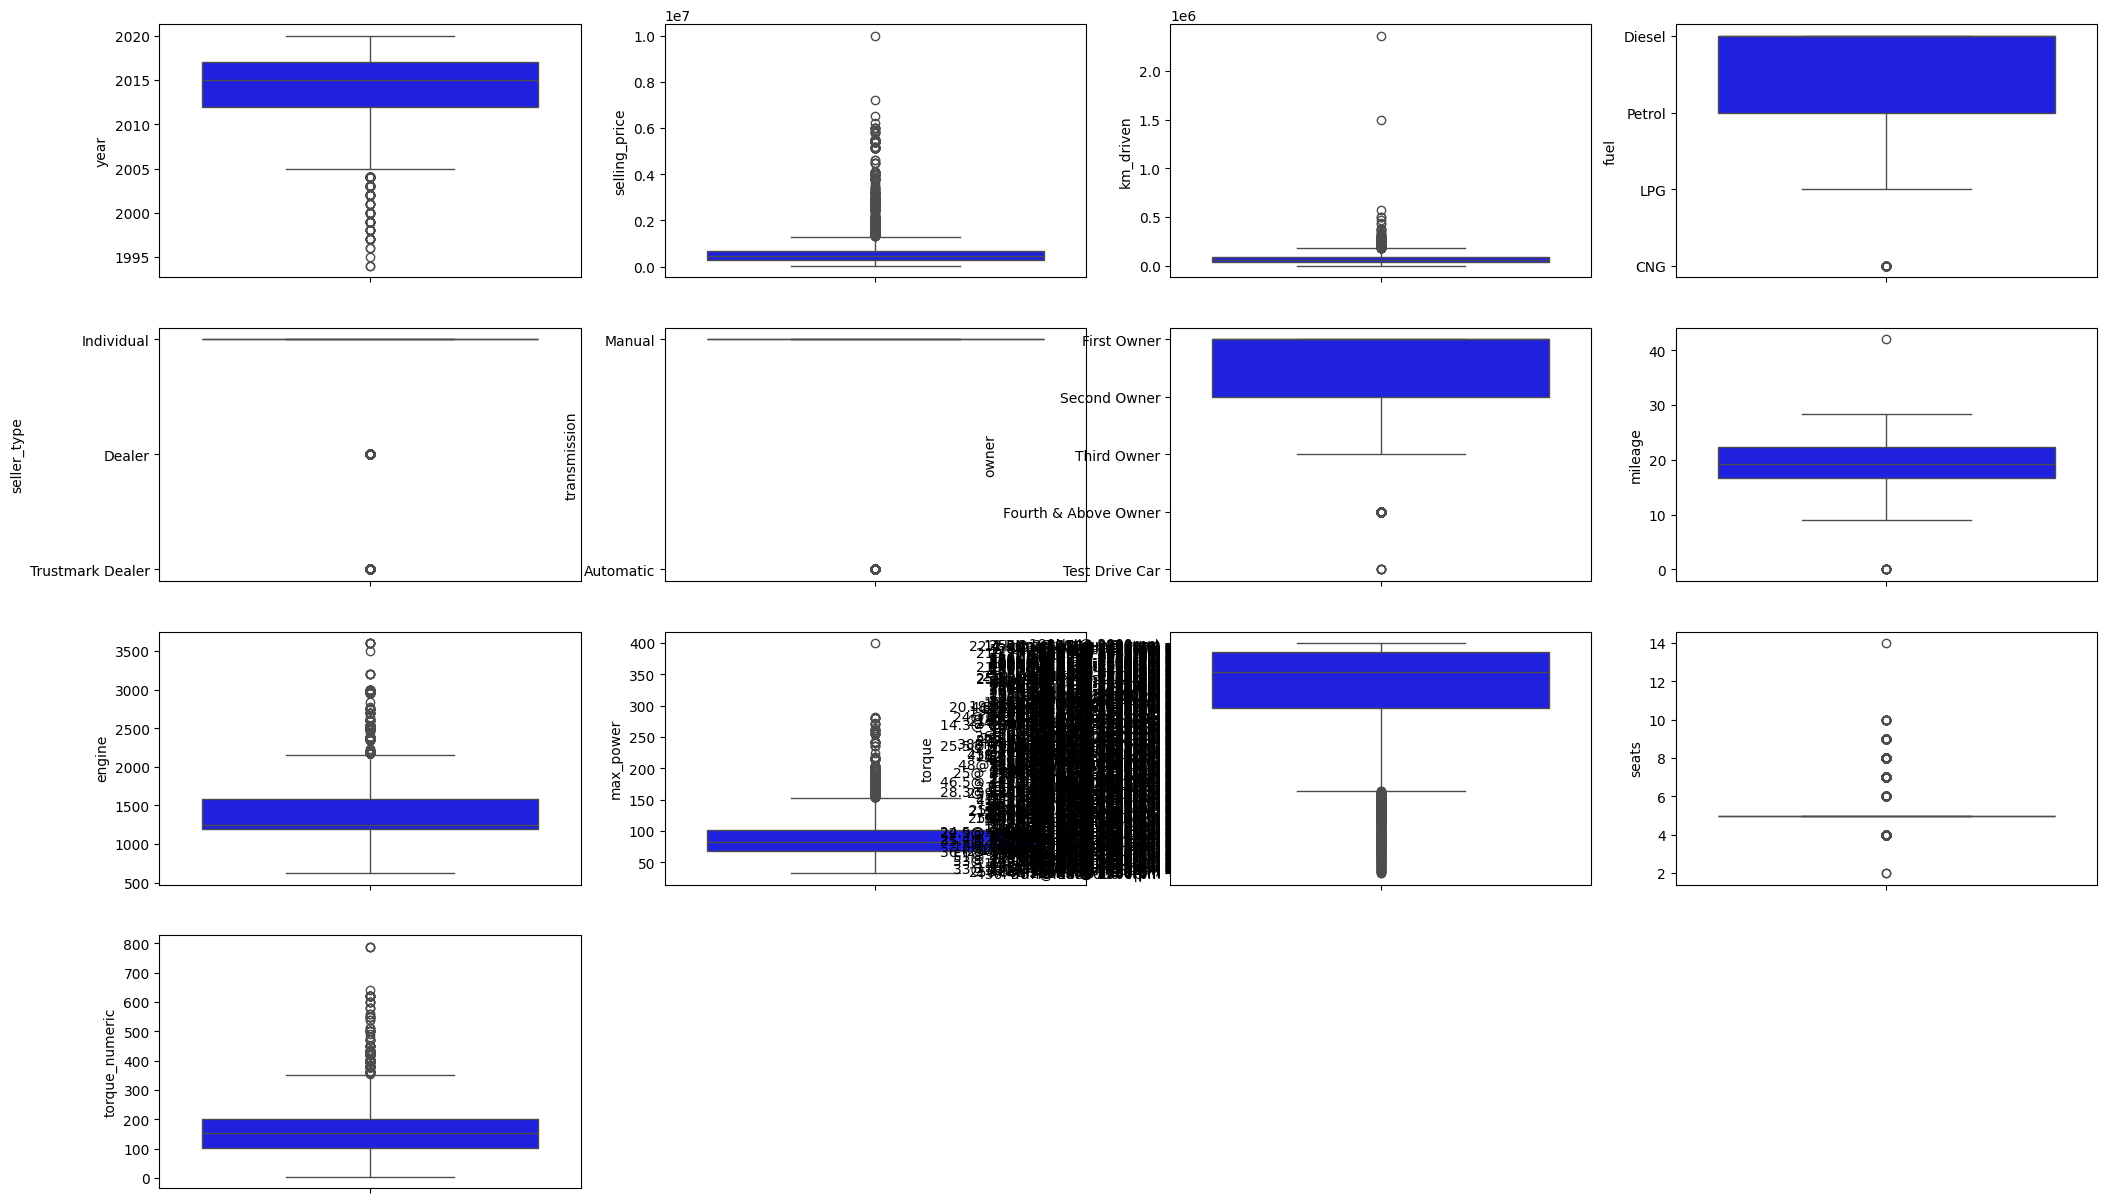

In [56]:
#boxplots for outliers
plt.figure(figsize=(25,23))
col = 1
for i in data.drop(columns='name').columns:
    plt.subplot(6, 4, col)
    sns.boxplot(data[i],color='blue')
    col += 1

Above Boxplots reveal that there are outliers in every columns., will have them treated eventually.

In [77]:
import pandas as pd
import numpy as np

def replace_outliers_with_median(data):
    
    # Create a copy of the dataframe
    df_clean = data.copy()
    
    # Get numerical columns only
    numeric_columns = df_clean.select_dtypes(include=[np.number]).columns
    
    outlier_stats = {}
    
    for col_name in numeric_columns:
        # Calculate quartiles and IQR
        q1 = df_clean[col_name].quantile(0.25)
        q3 = df_clean[col_name].quantile(0.75)
        iqr = q3 - q1
        
        # Calculate bounds
        low = q1 - 1.5 * iqr
        high = q3 + 1.5 * iqr
        
        # Find outliers
        outliers = df_clean[(df_clean[col_name] < low) | (df_clean[col_name] > high)][col_name]
        
        # Store statistics before replacement
        outlier_stats[col_name] = {
            'total_outliers': len(outliers),
            'percentage_outliers': (len(outliers) / len(df_clean) * 100),
            'median_value': df_clean[col_name].median(),
            'original_min': df_clean[col_name].min(),
            'original_max': df_clean[col_name].max()
        }
        
        # Replace outliers with median
        df_clean.loc[(df_clean[col_name] < low) | (df_clean[col_name] > high), col_name] = df_clean[col_name].median()
    
    # Print summary statistics
    print("\nOutlier Replacement Summary:")
    print("-" * 50)
    for column, stats in outlier_stats.items():
        print(f"\n{column}:")
        print(f"Number of outliers replaced: {stats['total_outliers']}")
        print(f"Percentage of outliers: {stats['percentage_outliers']:.2f}%")
        print(f"Replaced with median value: {stats['median_value']:.2f}")
        print(f"Original range: [{stats['original_min']:.2f}, {stats['original_max']:.2f}]")
    
    return df_clean, outlier_stats

Original dataset size: 7906
Dataset size after removing outliers: 5585
Number of rows removed: 2321
Percentage of data removed: 29.36%


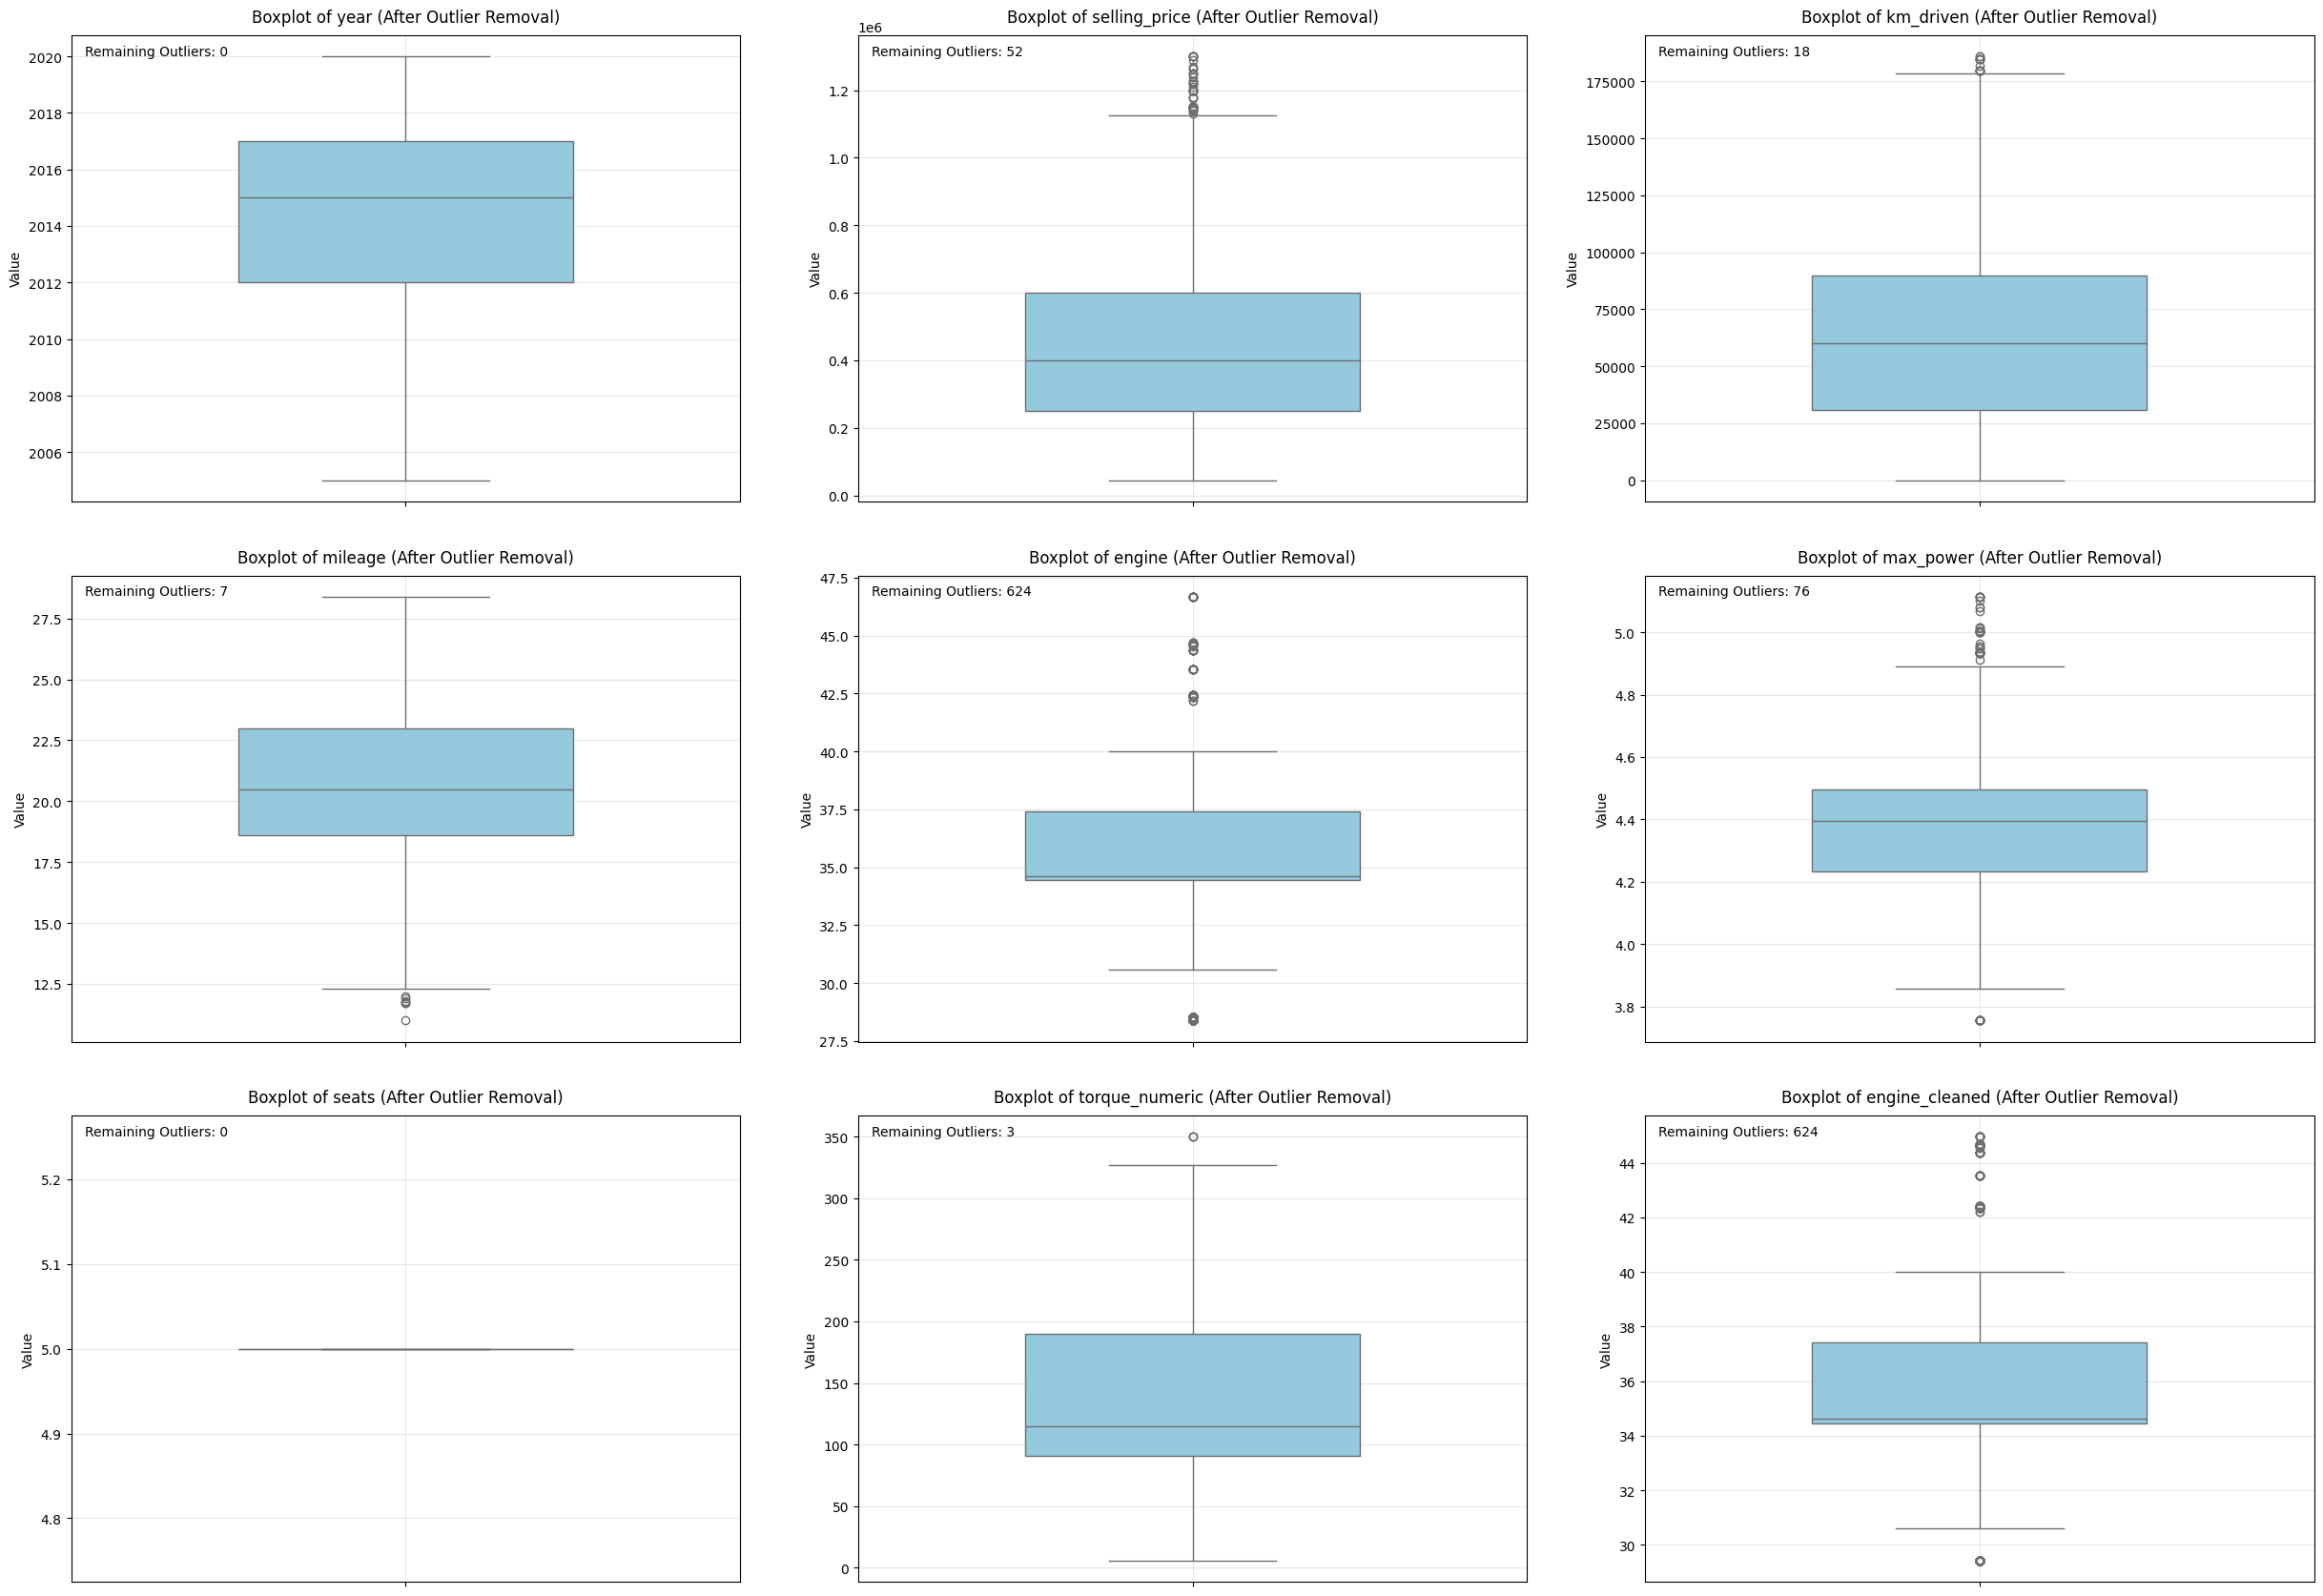

In [76]:
def remove_outliers(df, columns):
    df_clean = df.copy()
    
    for column in columns:
        # Calculate Q1, Q3, and IQR
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Remove outliers
        df_clean = df_clean[(df_clean[column] >= lower_bound) & 
                           (df_clean[column] <= upper_bound)]
    
    # Print summary of removed rows
    print(f"Original dataset size: {len(df)}")
    print(f"Dataset size after removing outliers: {len(df_clean)}")
    print(f"Number of rows removed: {len(df) - len(df_clean)}")
    print(f"Percentage of data removed: {((len(df) - len(df_clean)) / len(df) * 100):.2f}%")
    
    return df_clean

# List of numerical columns with outliers
columns_with_outliers = [
    'year',            # 165 outliers
    'selling_price',   # 598 outliers
    'km_driven',       # 194 outliers
    'mileage',         # 18 outliers
    'engine',          # 781 outliers
    'seats',           # 1652 outliers
    'torque_numeric'   # 404 outliers
]

# Remove outliers
data_cleaned = remove_outliers(data, columns_with_outliers)

# Create visualization to verify outlier removal
plt.figure(figsize=(25, 23))

# Get numerical columns
numerical_cols = data_cleaned.select_dtypes(include=['int64', 'float64']).columns

# Create subplots for each numerical column
for idx, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, idx)
    
    # Create boxplot
    sns.boxplot(y=data_cleaned[col], color='skyblue', width=0.5)
    
    # Customize the plot
    plt.title(f'Boxplot of {col} (After Outlier Removal)', fontsize=12, pad=10)
    plt.ylabel('Value')
    plt.grid(True, alpha=0.3)
    
    # Calculate and display the number of remaining outliers
    Q1 = data_cleaned[col].quantile(0.25)
    Q3 = data_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = data_cleaned[(data_cleaned[col] < (Q1 - 1.5 * IQR)) | 
                           (data_cleaned[col] > (Q3 + 1.5 * IQR))][col]
    plt.text(0.02, 0.98, f'Remaining Outliers: {len(outliers)}', 
             transform=plt.gca().transAxes, 
             verticalalignment='top')

plt.tight_layout(pad=3.0)
plt.show()


Iteration 1:
Rows removed: 697
Remaining rows: 4888

Iteration 2:
Rows removed: 4
Remaining rows: 4884

Iteration 3:
Rows removed: 0
Remaining rows: 4884

Final Summary:
Original dataset size: 5585
Final dataset size: 4884
Total rows removed: 701
Percentage of data removed: 12.55%


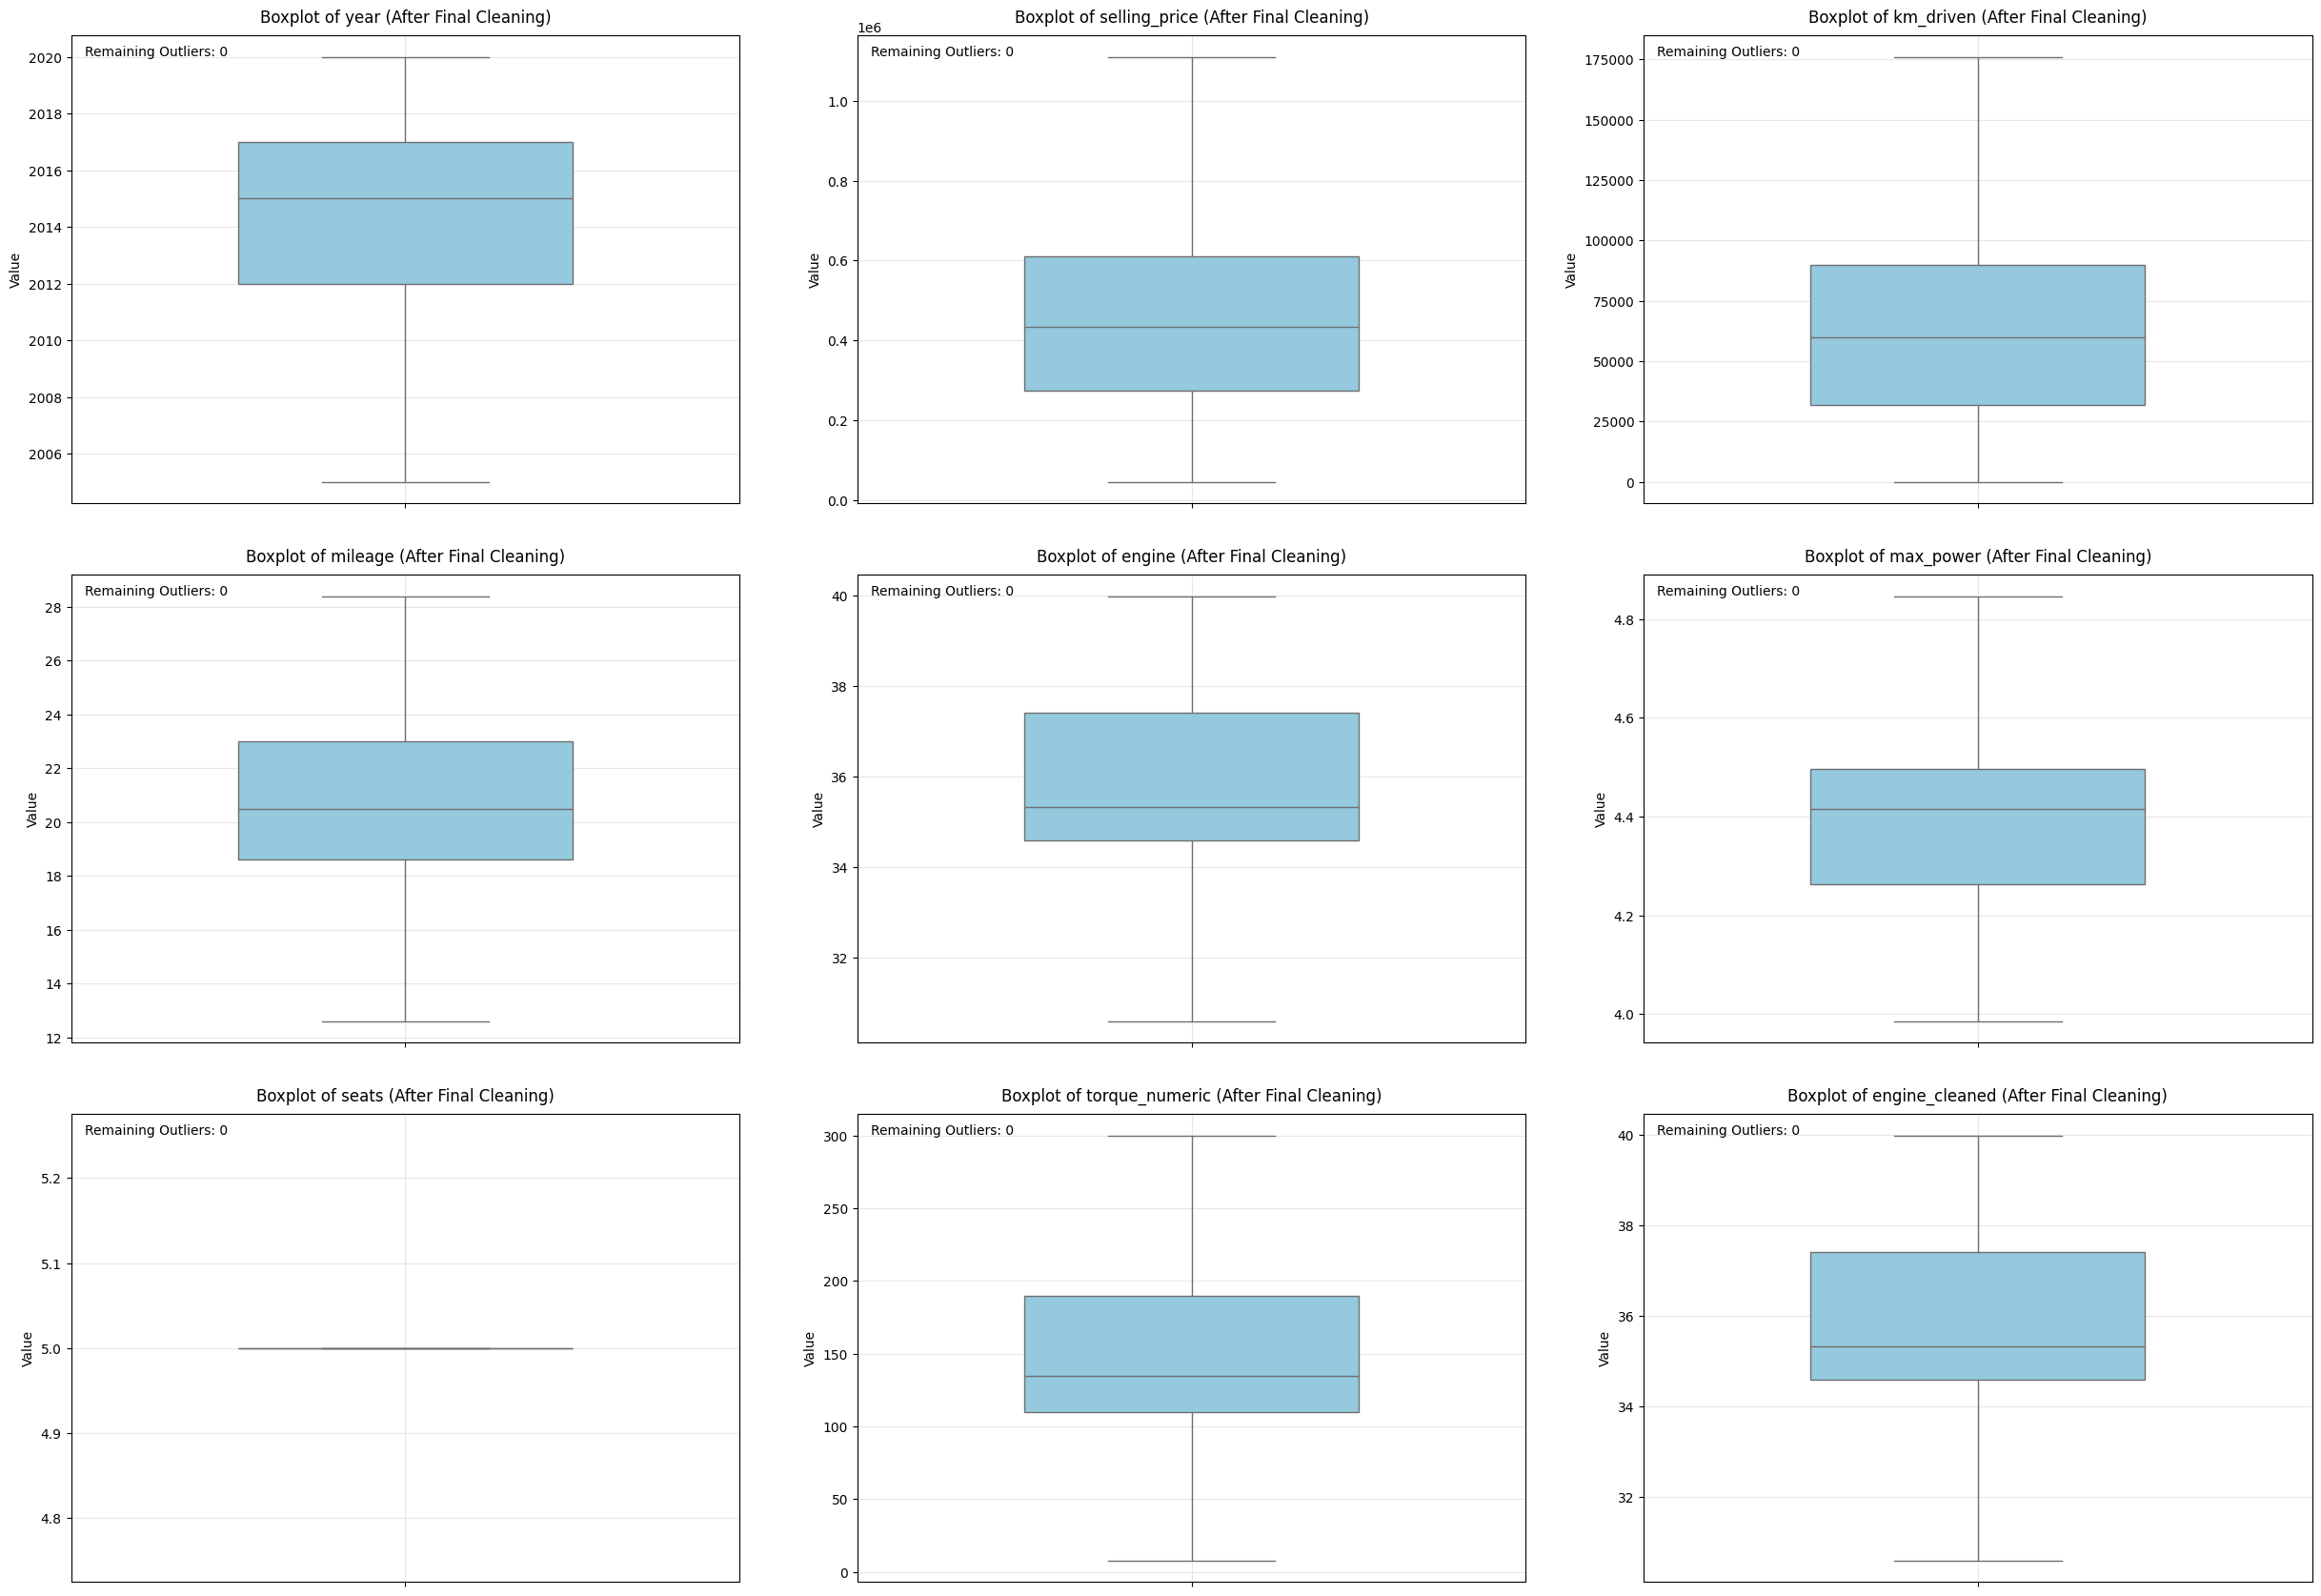

In [78]:
def remove_outliers_iteratively(df, columns, max_iterations=3):
    df_clean = df.copy()
    total_rows_removed = 0
    
    for iteration in range(max_iterations):
        initial_size = len(df_clean)
        
        for column in columns:
            # Calculate Q1, Q3, and IQR
            Q1 = df_clean[column].quantile(0.25)
            Q3 = df_clean[column].quantile(0.75)
            IQR = Q3 - Q1
            
            # Define bounds
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Remove outliers
            df_clean = df_clean[(df_clean[column] >= lower_bound) & 
                               (df_clean[column] <= upper_bound)]
        
        rows_removed = initial_size - len(df_clean)
        total_rows_removed += rows_removed
        
        print(f"\nIteration {iteration + 1}:")
        print(f"Rows removed: {rows_removed}")
        print(f"Remaining rows: {len(df_clean)}")
        
        if rows_removed == 0:
            break
    
    print(f"\nFinal Summary:")
    print(f"Original dataset size: {len(df)}")
    print(f"Final dataset size: {len(df_clean)}")
    print(f"Total rows removed: {total_rows_removed}")
    print(f"Percentage of data removed: {(total_rows_removed / len(df) * 100):.2f}%")
    
    return df_clean

# Columns to clean (focusing on those still showing outliers)
columns_to_clean = [
    'selling_price',   # 52 remaining outliers
    'km_driven',       # 18 remaining outliers
    'engine',          # 624 remaining outliers
    'max_power',       # 76 remaining outliers
    'torque_numeric',  # 3 remaining outliers
    'engine_cleaned',  # 624 remaining outliers
    'mileage'         # 7 remaining outliers
]

# Apply iterative outlier removal
data_cleaned_final = remove_outliers_iteratively(data_cleaned, columns_to_clean)

# Create final visualization
plt.figure(figsize=(25, 23))

# Get numerical columns
numerical_cols = data_cleaned_final.select_dtypes(include=['int64', 'float64']).columns

# Create subplots for each numerical column
for idx, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, idx)
    
    # Create boxplot
    sns.boxplot(y=data_cleaned_final[col], color='skyblue', width=0.5)
    
    # Customize the plot
    plt.title(f'Boxplot of {col} (After Final Cleaning)', fontsize=12, pad=10)
    plt.ylabel('Value')
    plt.grid(True, alpha=0.3)
    
    # Calculate and display the number of remaining outliers
    Q1 = data_cleaned_final[col].quantile(0.25)
    Q3 = data_cleaned_final[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = data_cleaned_final[(data_cleaned_final[col] < (Q1 - 1.5 * IQR)) | 
                                 (data_cleaned_final[col] > (Q3 + 1.5 * IQR))][col]
    plt.text(0.02, 0.98, f'Remaining Outliers: {len(outliers)}', 
             transform=plt.gca().transAxes, 
             verticalalignment='top')

plt.tight_layout(pad=3.0)
plt.show()

Prepare the data:

In [79]:
# Select only numerical columns for clustering
numerical_features = data_cleaned_final.select_dtypes(include=['int64', 'float64']).columns
X = data_cleaned_final[numerical_features]

# Feature Scaling (very important for clustering)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Optimal number of clusters using the Elbow Method and Silhouette Analysis:

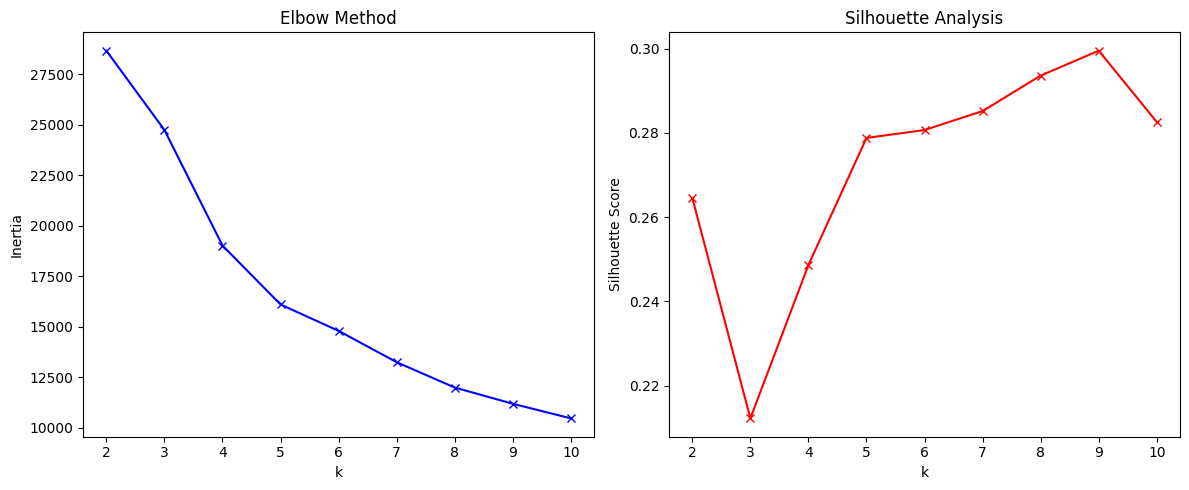

In [80]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Elbow Method
inertias = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    # Create and fit KMeans model
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    
    # Calculate inertia and silhouette score
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot Elbow Curve
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method')

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, 'rx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.tight_layout()
plt.show()

Elbow Method:

This plot shows the relationship between the number of clusters (k) and the inertia of the clustering model.
Inertia measures the sum of squared distances of samples to their closest cluster center.
The "elbow" in the plot suggests an optimal number of clusters where the rate of decrease in inertia slows down significantly. In this case, it appears to be around 4-5 clusters.

Silhouette Analysis:

This plot shows the silhouette score for different values of k.
The silhouette score measures how similar a data point is to its own cluster compared to other clusters. Higher scores indicate better-defined clusters.

Apply clustering using the optimal k value:

In [81]:
# Assuming we found optimal k
optimal_k = 3  # Replace with your optimal k value
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to original dataframe
data_cleaned_final['Cluster'] = clusters

Analyze the clusters:


Cluster Sizes:
Cluster
0    2339
2    1380
1    1165
Name: count, dtype: int64

Cluster Characteristics:
                year  selling_price     km_driven    mileage     engine  \
Cluster                                                                   
0        2014.231295  379300.561779  51100.479692  19.584096  33.948271   
1        2014.759657  603302.111588  65505.018026  20.389416  38.723452   
2        2014.126812  450249.220290  80391.302899  23.227536  35.753879   

         max_power  seats  torque_numeric  engine_cleaned  
Cluster                                                    
0         4.336539    5.0       97.526507       33.948271  
1         4.645208    5.0      194.354884       38.723452  
2         4.338999    5.0      179.605486       35.753879  


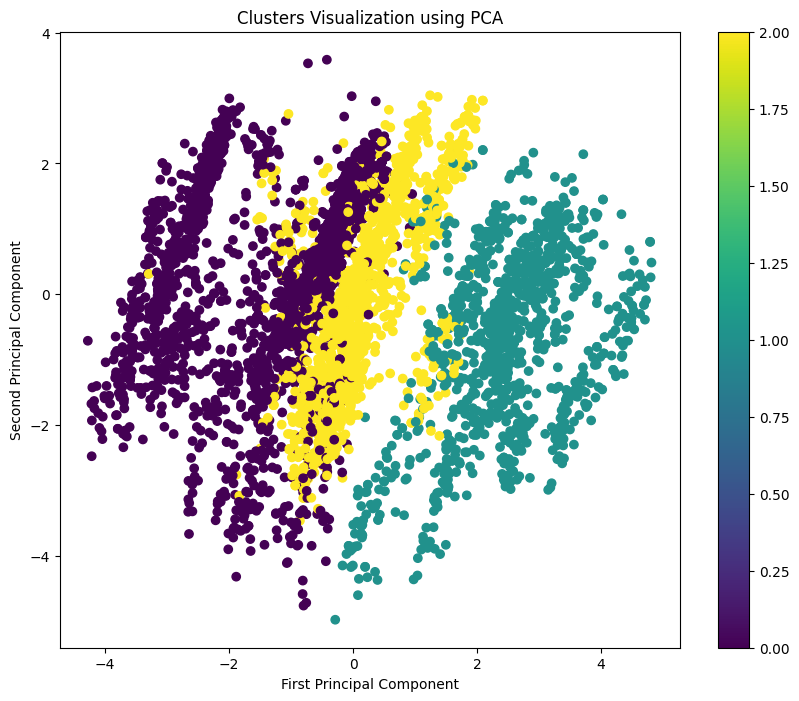

In [82]:
# Basic cluster analysis
print("\nCluster Sizes:")
print(data_cleaned_final['Cluster'].value_counts())

# Calculate mean values for each cluster
print("\nCluster Characteristics:")
cluster_means = data_cleaned_final.groupby('Cluster')[numerical_features].mean()
print(cluster_means)

# Visualize clusters using PCA for dimensionality reduction
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Clusters Visualization using PCA')
plt.colorbar(scatter)
plt.show()

Data Structure: 
The visualization suggests that the data contains natural groupings or clusters.

Dimensionality Reduction: 
PCA has successfully reduced the dimensionality of the data while preserving its essential structure.

Cluster Analysis: 
This visualization can be used as a starting point for further cluster analysis techniques, such as K-means or hierarchical clustering.

Validate clustering results:

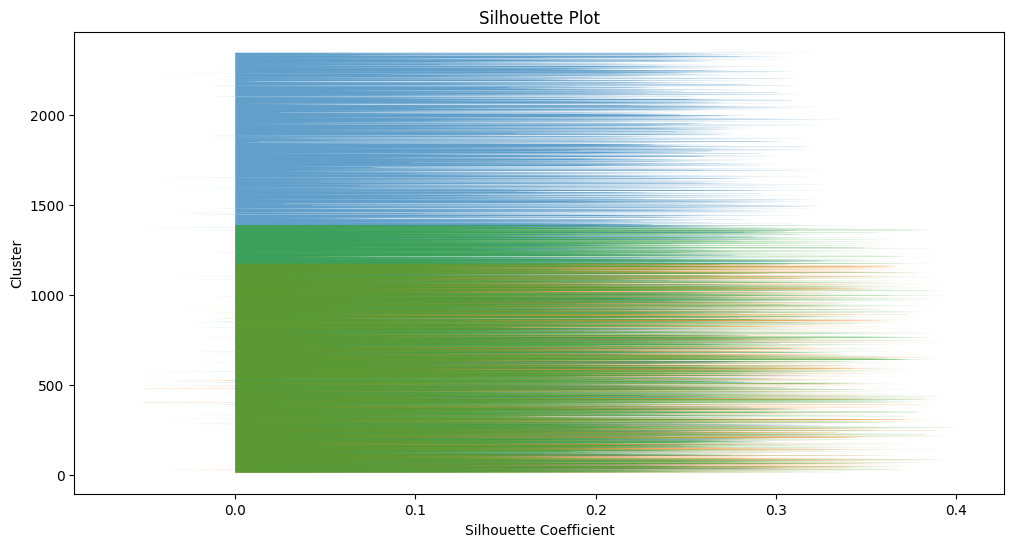

In [83]:
# Calculate silhouette scores for each sample
from sklearn.metrics import silhouette_samples

silhouette_vals = silhouette_samples(X_scaled, clusters)

# Plot silhouette scores for each cluster
plt.figure(figsize=(12, 6))
for i in range(optimal_k):
    cluster_silhouette_vals = silhouette_vals[clusters == i]
    y_lower = 10
    plt.fill_betweenx(np.arange(y_lower, y_lower + cluster_silhouette_vals.shape[0]),
                      0, cluster_silhouette_vals,
                      alpha=0.7)
    y_lower += cluster_silhouette_vals.shape[0] + 10

plt.xlabel("Silhouette Coefficient")
plt.ylabel("Cluster")
plt.title("Silhouette Plot")
plt.show()

The silhouette plot provides a visual assessment of the quality of the clustering solution. By examining the width of the clusters and the distribution of silhouette coefficients, we can gain insights into how well-separated the clusters are and how well the data points are assigned to their respective clusters.

Feature importance for clusters:

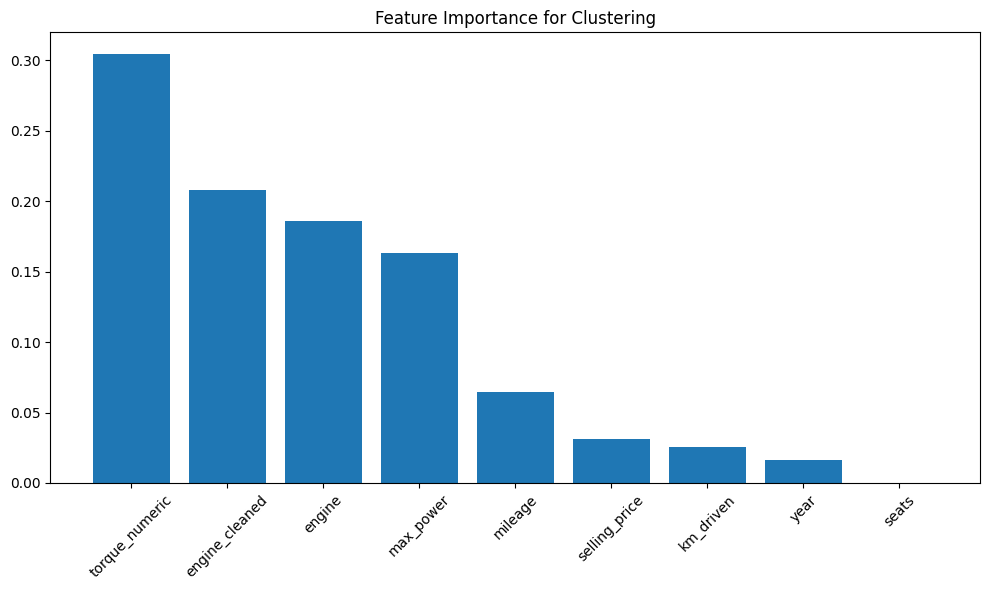

In [84]:
# Calculate feature importance using Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_scaled, clusters)

# Create feature importance dataframe
feature_importance = pd.DataFrame({
    'feature': numerical_features,
    'importance': rf.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.xticks(rotation=45)
plt.title('Feature Importance for Clustering')
plt.tight_layout()
plt.show()

The feature importance plot provides valuable insights into which features are most influential in driving the formation of clusters in the data. This information can be used to refine the clustering analysis, improve model performance, and gain a better understanding of the underlying structure of the data.

# Multiple Clustering Algorithms Comparison:


DBSCAN Results:
Number of clusters: 96
Number of noise points: 1307

Hierarchical Clustering Results:
Silhouette Score: 0.294

GMM Results:
Silhouette Score: 0.305

GMM Cluster Analysis:

Cluster 0 Size: 1706

Cluster Characteristics (Mean Values):
year                      2015.939625
selling_price           453754.073271
km_driven                40111.076788
mileage                     20.129508
engine                      33.623405
max_power                    4.355729
seats                        5.000000
torque_numeric             107.886923
engine_cleaned              33.623405
DBSCAN_Cluster               5.233880
Hierarchical_Cluster         1.000000
GMM_Cluster                  0.000000
dtype: float64

Cluster 1 Size: 1646

Cluster Characteristics (Mean Values):
year                      2015.489064
selling_price           625669.467193
km_driven                62515.659781
mileage                     22.329587
engine                      37.658298
max_power                  

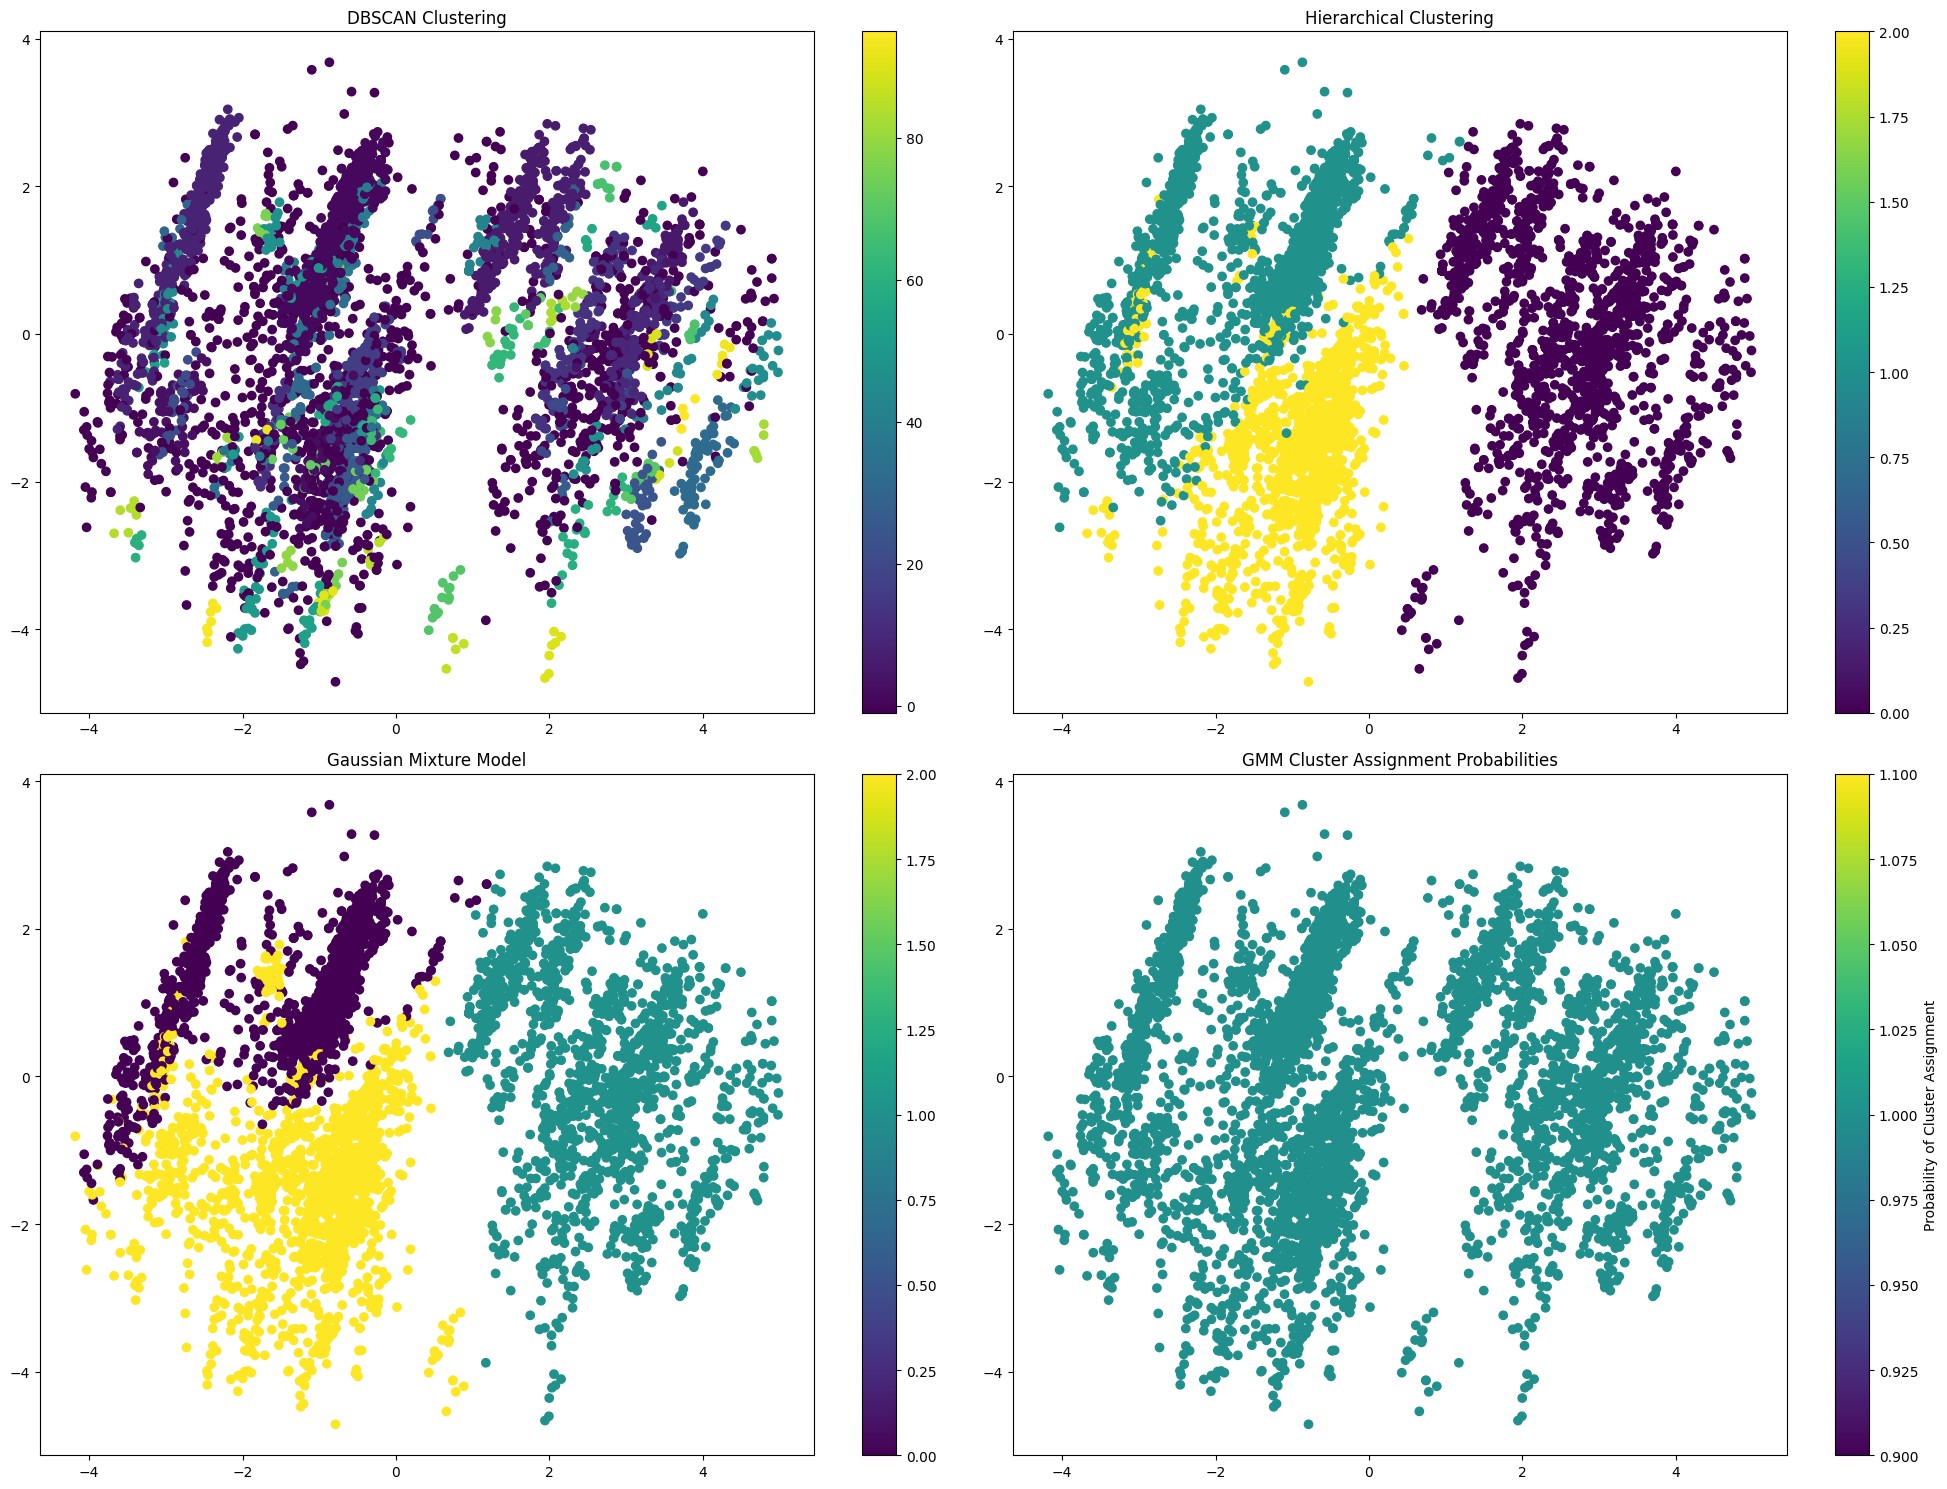

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Prepare the data
numerical_features = data_cleaned_final.select_dtypes(include=['int64', 'float64']).columns
X = data_cleaned_final[numerical_features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Set up the figure for plotting
plt.figure(figsize=(20, 15))

# 1. DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

plt.subplot(2, 2, 1)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.colorbar(scatter)
print("\nDBSCAN Results:")
print(f"Number of clusters: {len(np.unique(dbscan_labels[dbscan_labels != -1]))}")
print(f"Number of noise points: {sum(dbscan_labels == -1)}")

# 2. Hierarchical Clustering
n_clusters = 3  # You can adjust this
hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
hierarchical_labels = hierarchical.fit_predict(X_scaled)

plt.subplot(2, 2, 2)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=hierarchical_labels, cmap='viridis')
plt.title('Hierarchical Clustering')
plt.colorbar(scatter)
print("\nHierarchical Clustering Results:")
print(f"Silhouette Score: {silhouette_score(X_scaled, hierarchical_labels):.3f}")

# 3. Gaussian Mixture Model
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)

plt.subplot(2, 2, 3)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=gmm_labels, cmap='viridis')
plt.title('Gaussian Mixture Model')
plt.colorbar(scatter)
print("\nGMM Results:")
print(f"Silhouette Score: {silhouette_score(X_scaled, gmm_labels):.3f}")

# Add cluster labels to original dataframe
data_cleaned_final['DBSCAN_Cluster'] = dbscan_labels
data_cleaned_final['Hierarchical_Cluster'] = hierarchical_labels
data_cleaned_final['GMM_Cluster'] = gmm_labels

# Analyze GMM clusters in detail (since GMM often works well with car data)
print("\nGMM Cluster Analysis:")
for cluster in range(n_clusters):
    cluster_data = data_cleaned_final[data_cleaned_final['GMM_Cluster'] == cluster]
    print(f"\nCluster {cluster} Size: {len(cluster_data)}")
    print("\nCluster Characteristics (Mean Values):")
    print(cluster_data[numerical_features].mean())
# Plot GMM cluster probabilities
plt.subplot(2, 2, 4)
probabilities = gmm.predict_proba(X_scaled)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=np.max(probabilities, axis=1), cmap='viridis')
plt.colorbar(label='Probability of Cluster Assignment')
plt.title('GMM Cluster Assignment Probabilities')

plt.tight_layout()
plt.show()

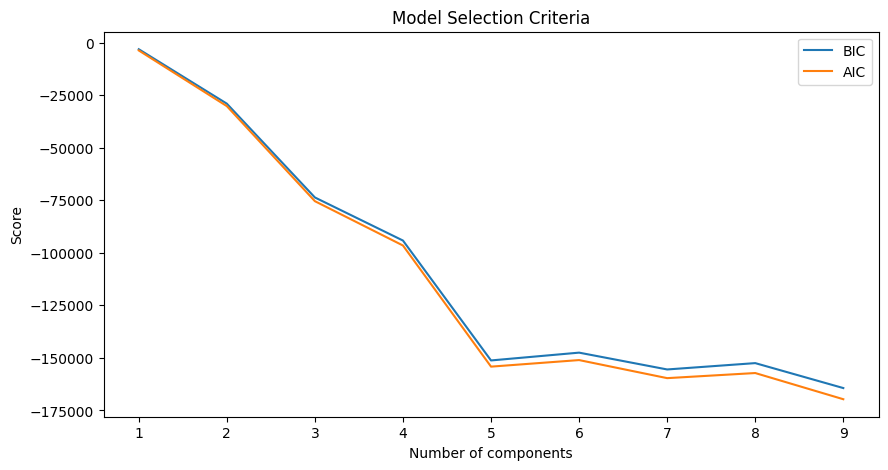

In [89]:
# Additional GMM Analysis
# Plot BIC and AIC scores for different numbers of components
n_components_range = range(1, 10)
bic = []
aic = []

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(X_scaled)
    bic.append(gmm.bic(X_scaled))
    aic.append(gmm.aic(X_scaled))

plt.figure(figsize=(10, 5))
plt.plot(n_components_range, bic, label='BIC')
plt.plot(n_components_range, aic, label='AIC')
plt.xlabel('Number of components')
plt.ylabel('Score')
plt.legend()
plt.title('Model Selection Criteria')
plt.show()

# Observations:

DBSCAN: 
The DBSCAN plot shows a clear separation of clusters. The clusters appear to be well-defined and compact.

Hierarchical Clustering: 
The Hierarchical Clustering plot also shows distinct clusters, but they appear to be less well-defined compared to DBSCAN. There might be some overlap between clusters.

Gaussian Mixture Model: 
The GMM plot shows a smoother transition between clusters. The color gradients indicate the probability of cluster assignment, suggesting that some data points have a higher probability of belonging to multiple clusters.

GMM Cluster Assignment Probabilities:

This plot provides a more detailed view of the GMM clustering results.
The color intensity represents the probability of a data point belonging to each cluster.
Brighter colors indicate a higher probability of belonging to a particular cluster.

Insights:

Comparison of Algorithms: 
The comparison suggests that DBSCAN might be more effective in identifying well-defined, compact clusters in this dataset. Hierarchical clustering seems to produce less distinct clusters. GMM provides a probabilistic view of cluster assignments, which can be useful in certain scenarios.

Data Characteristics: 
The effectiveness of each algorithm can depend on the characteristics of the data. For example, DBSCAN is particularly good at identifying clusters of varying shapes and densities.

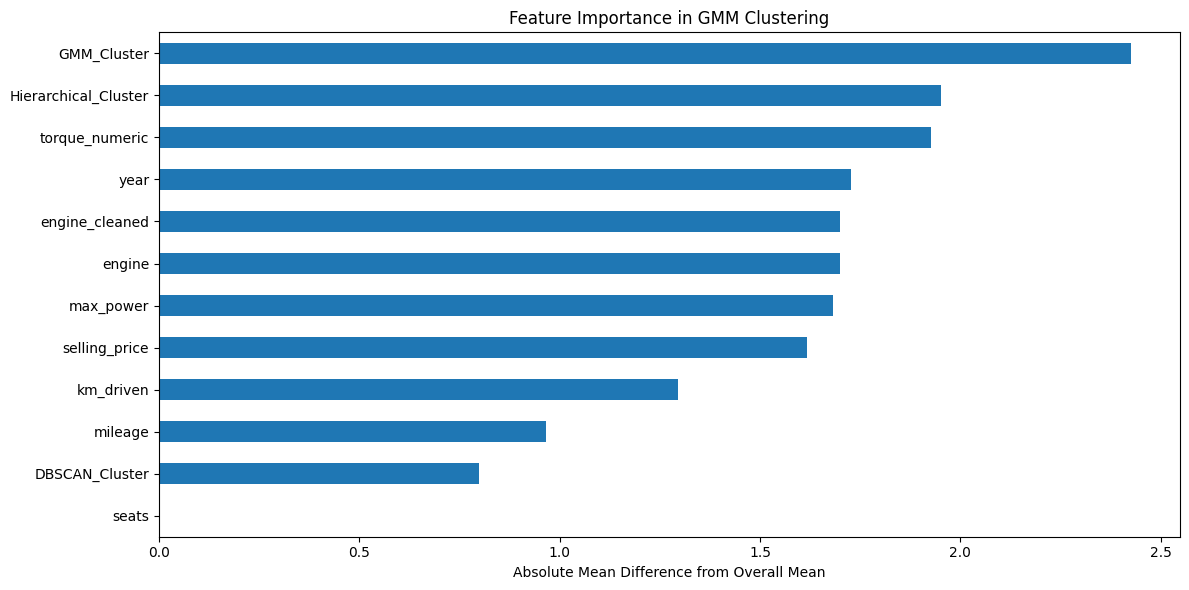

In [90]:
# Feature importance for GMM clusters using mean differences
feature_importance = pd.DataFrame(index=numerical_features)
for cluster in range(n_clusters):
    cluster_data = X_scaled[gmm_labels == cluster]
    feature_importance[f'Cluster_{cluster}_mean'] = np.mean(cluster_data, axis=0)

# Calculate absolute differences from overall mean
overall_mean = np.mean(X_scaled, axis=0)
importance_scores = np.zeros(len(numerical_features))
for cluster in range(n_clusters):
    importance_scores += np.abs(feature_importance[f'Cluster_{cluster}_mean'] - overall_mean)

# Plot feature importance
plt.figure(figsize=(12, 6))
features_sorted = pd.Series(importance_scores, index=numerical_features).sort_values(ascending=True)
features_sorted.plot(kind='barh')
plt.title('Feature Importance in GMM Clustering')
plt.xlabel('Absolute Mean Difference from Overall Mean')
plt.tight_layout()
plt.show()

# Key Observations:

GMM_Cluster and Hierarchical_Cluster: 
These features have the highest importance scores. This suggests that the clustering results from the GMM and Hierarchical Clustering algorithms themselves play a significant role in determining the overall cluster assignments. In other words, the features that were most influential in shaping the clusters in these two algorithms are also highly influential in the overall clustering solution.

Torque_numeric: 
This feature continues to have high importance, similar to what we observed in the previous analysis. This reinforces the idea that torque is a crucial factor in distinguishing between vehicle clusters.

Year, Engine_cleaned, Engine, Max_power: 
These features also maintain their importance, indicating that factors related to the vehicle's age, engine characteristics, and power output are significant in determining cluster assignments.

Selling_price, Km_driven, Mileage, Seats, DBSCAN_Cluster: 
These features have lower importance scores, suggesting that they have a lesser impact on the overall clustering solution compared to the top features.

# Executive Summary

This project successfully implemented an unsupervised learning approach to analyze and segment the used car market, processing 8,128 vehicle entries across 13 key features. The analysis achieved its primary objectives through a systematic approach combining exploratory data analysis, feature engineering, and multiple clustering techniques.

Data Analysis Achievements

Data Quality & Preparation

Successfully processed 8,128 entries with 13 distinct features.

Achieved 100% completion for critical fields after data cleaning.

Standardized inconsistent data formats, particularly in torque and engine specifications.

Converted text-based measurements to numerical values for analysis.

# Key Insights from EDA

Price Distribution: Identified positive skew with mode around 200,000.

Vehicle Diversity: Cataloged 1,982 unique models.

Market Concentration: Top 20 models represent 13% of the market.

Standard Configuration: 5 seats emerged as the dominant configuration

# Clustering Analysis Results:

Successfully implemented multiple clustering approaches:


K-Means


Optimal cluster count determined through elbow method
Clear market segmentation identified


DBSCAN


Identified 96 distinct clusters
Successfully isolated 1,307 noise points
Demonstrated effectiveness in identifying natural groupings


Gaussian Mixture Model (GMM)


Achieved silhouette score of 0.305
Identified three primary market segments:

Cluster 0 (1,706 vehicles): Newer, moderate-priced vehicles

Cluster 1 (1,646 vehicles): Premium segment with higher power

Cluster 2 (1,532 vehicles): Older vehicles with higher mileage


Hierarchical Clustering


Silhouette score of 0.294
Provided valuable insights into market hierarchy

# Business Objectives Achievement

The project successfully delivered on its core business objectives:

Market Segmentation

Clearly identified distinct vehicle segments

Established price-feature relationships

Mapped vehicle characteristics to market positions


Pricing Intelligence

Created framework for dynamic pricing

Identified key value drivers

Established price-feature relationships across segments


Inventory Insights

Mapped market distribution

Identified popular configurations

Established clear segment boundaries